<a href="https://colab.research.google.com/github/JohnPoma/Lung_cancer_projet/blob/main/lung_col_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# code pour monter drive dans colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# prompt: afficher le nombre de données par repertoires du dossier principal

import os

# Replace '/content/drive/MyDrive' with the actual path to your main directory
main_directory = '/content/drive/My Drive/Deeplearning/lung_image_sets'

for root, dirs, files in os.walk(main_directory):
  print(f"Directory: {root}, Number of files: {len(files)}")

Directory: /content/drive/My Drive/Deeplearning/lung_image_sets, Number of files: 1
Directory: /content/drive/My Drive/Deeplearning/lung_image_sets/lung_n, Number of files: 5000
Directory: /content/drive/My Drive/Deeplearning/lung_image_sets/lung_aca, Number of files: 5000
Directory: /content/drive/My Drive/Deeplearning/lung_image_sets/lung_scc, Number of files: 5000
Directory: /content/drive/My Drive/Deeplearning/lung_image_sets/colon_aca, Number of files: 5000
Directory: /content/drive/My Drive/Deeplearning/lung_image_sets/colon_n, Number of files: 5000


In [ ]:
# prompt: code pour repartir les donnees du repertoire principal en 3 sous repertoires train(70%),test(15%) et val (15%) tout en gardant les dossiers des 5 classes de depart. les train,test,val doivent se retrouver dans un nouveau repertoire split

import os
import random
import shutil

# Replace '/content/drive/MyDrive' with the actual path to your main directory
main_directory = '/content/drive/My Drive/Deeplearning/lung_image_sets'
split_directory = '/content/drive/My Drive/Deeplearning/split_lun_col' # New directory for train, test, val

# Create the split directory if it doesn't exist
os.makedirs(split_directory, exist_ok=True)
os.makedirs(os.path.join(split_directory,'train'), exist_ok=True)
os.makedirs(os.path.join(split_directory,'test'), exist_ok=True)
os.makedirs(os.path.join(split_directory,'val'), exist_ok=True)


for class_name in os.listdir(main_directory):
  class_dir = os.path.join(main_directory,class_name)

  if os.path.isdir(class_dir):
    images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir,f))]
    random.shuffle(images)

    train_split = int(0.7 * len(images))
    test_split = int(0.15 * len(images))

    train_images = images[:train_split]
    test_images = images[train_split : train_split + test_split]
    val_images = images[train_split + test_split :]

    os.makedirs(os.path.join(split_directory,'train',class_name),exist_ok=True)
    os.makedirs(os.path.join(split_directory,'test',class_name),exist_ok=True)
    os.makedirs(os.path.join(split_directory,'val',class_name),exist_ok=True)


    for image in train_images:
        source_path = os.path.join(class_dir,image)
        destination_path = os.path.join(split_directory,'train', class_name, image)
        shutil.copy(source_path, destination_path)

    for image in test_images:
        source_path = os.path.join(class_dir,image)
        destination_path = os.path.join(split_directory,'test', class_name, image)
        shutil.copy(source_path, destination_path)

    for image in val_images:
        source_path = os.path.join(class_dir,image)
        destination_path = os.path.join(split_directory,'val', class_name, image)
        shutil.copy(source_path, destination_path)

In [ ]:
# prompt: afficher le nombre des données par classe dans train,test et val

import os

split_directory = '/content/drive/My Drive/Deeplearning/split_lun_col'

for subset in ['train', 'test', 'val']:
    subset_dir = os.path.join(split_directory, subset)
    print(f"\nSubset: {subset}")
    for class_name in os.listdir(subset_dir):
        class_dir = os.path.join(subset_dir, class_name)
        if os.path.isdir(class_dir):
            num_images = len(os.listdir(class_dir))
            print(f"Class: {class_name}, Number of images: {num_images}")


Subset: train
Class: lung_n, Number of images: 3500
Class: lung_aca, Number of images: 3500
Class: lung_scc, Number of images: 3500
Class: colon_aca, Number of images: 3500
Class: colon_n, Number of images: 3500

Subset: test
Class: lung_n, Number of images: 750
Class: lung_aca, Number of images: 750
Class: lung_scc, Number of images: 750
Class: colon_aca, Number of images: 750
Class: colon_n, Number of images: 750

Subset: val
Class: lung_n, Number of images: 750
Class: lung_aca, Number of images: 750
Class: lung_scc, Number of images: 750
Class: colon_aca, Number of images: 750
Class: colon_n, Number of images: 750


In [3]:
# prompt: applique la data augmentation sur les données d'entrainement

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Chemin vers le répertoire contenant les données d'entraînement
train_data_dir = '/content/drive/My Drive/Deeplearning/split_lun_col/train'
test_dataset_path = '/content/drive/My Drive/Deeplearning/split_lun_col/test'
val_dataset_path = '/content/drive/My Drive/Deeplearning/split_lun_col/val'

# Créer un générateur d'augmentation de données
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Appliquer l'augmentation de données sur les données d'entraînement
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1./255)  # You might want to apply the same preprocessing as training data

val_generator = val_datagen.flow_from_directory(
    val_dataset_path,
    target_size=(224, 224),
    batch_size=32,  # Adjust batch size if needed
    shuffle=False,
    class_mode='categorical'
)
test_datagen = ImageDataGenerator(rescale=1./255)  # You might want to apply the same preprocessing as training data

test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=(224, 224),
    batch_size=32,  # Adjust batch size if needed,
    shuffle=False,
    class_mode='categorical'
)

Found 17500 images belonging to 5 classes.
Found 3750 images belonging to 5 classes.
Found 3750 images belonging to 5 classes.


In [4]:
from ast import mod
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers import concatenate, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from keras.models import Model
from keras.layers import Input
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import layers

# Chargement des modèles pré-entraînés sans la couche de classification
input_shape = (224, 224, 3)
input_tensor = Input(shape=input_shape)

efficientnet_b0_model = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=input_tensor)
xception_model = Xception(weights='imagenet', include_top=False, input_tensor=input_tensor)
mobilenet_v2_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Fine-tuning partiel : dégeler certaines couches
#for layer in efficientnet_b0_model.layers[-30:]:
#    layer.trainable = True
#for layer in xception_model.layers[-30:]:
    #layer.trainable = True
#for layer in mobilenet_v2_model.layers[-30:]:
#    layer.trainable = False

# Geler les poids des modèles EfficientNetB0 et Xception
for layer in efficientnet_b0_model.layers:
    layer.trainable = False
for layer in xception_model.layers:
    layer.trainable = False
for layer in mobilenet_v2_model.layers:
    layer.trainable = False

# Extraction des features
efficientnet_features = efficientnet_b0_model.output
xception_features = xception_model.output
mobilenet_v2_features = mobilenet_v2_model.output

# Fusion des features
merged_features = concatenate([efficientnet_features, xception_features,mobilenet_v2_features])

# Ajout des couches de classification
x = GlobalAveragePooling2D()(merged_features)
x = Dense(1024, activation='relu')(x) # Normalisation après la couche dense
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
#x = Dense(128, activation='relu')(x)
#x = Dropout(0.5)(x)
#x = Dense(64, activation='relu')(x)
#x = Dropout(0.5)(x)
output_layer = Dense(5, activation='softmax')(x)  # 3 classes

# Création du modèle hybride
hybrid_model = Model(inputs=input_tensor, outputs=output_layer)

# Compilation
optimizer = Adam(learning_rate=0.0001)
hybrid_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks avec ajustement dynamique du learning rate
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]



16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<ipython-input-4-9cc59c7b2cdc>:18: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_v2_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_tensor)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
# prompt: summary of our model

# Model Summary
hybrid_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 43,300,124 (165.18 MB)

 Trainable params: 5,377,029 (20.51 MB)

 Non-trainable params: 27,169,035 (103.64 MB)

 Optimizer params: 10,754,060 (41.02 MB)

In [5]:
# Entraînement
history = hybrid_model.fit(
    train_generator,
    epochs=20,  # Augmentez si les résultats s'améliorent 20
    batch_size=64,#64
    validation_data=val_generator,
    callbacks=callbacks
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


547/547 ━━━━━━━━━━━━━━━━━━━━ 8742s 16s/step - accuracy: 0.6713 - loss: 0.8685 - val_accuracy: 0.9184 - val_loss: 0.2384 - learning_rate: 1.0000e-04
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 417s 753ms/step - accuracy: 0.8974 - loss: 0.2710 - val_accuracy: 0.9629 - val_loss: 0.0960 - learning_rate: 1.0000e-04
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 438s 749ms/step - accuracy: 0.9389 - loss: 0.1686 - val_accuracy: 0.9691 - val_loss: 0.0815 - learning_rate: 1.0000e-04
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 405s 732ms/step - accuracy: 0.9485 - loss: 0.1418 - val_accuracy: 0.9629 - val_loss: 0.0973 - learning_rate: 1.0000e-04
Epoch 5/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 418s 757ms/step - accuracy: 0.9600 - loss: 0.1060 - val_accuracy: 0.9603 - val_loss: 0.1011 - learning_rate: 1.0000e-04
Epoch 6/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 437s 788ms/step - accuracy: 0.9481 - loss: 0.1323 - val_accuracy: 0.9685 - val_loss: 0.0783 - learning_rate: 1.0000e-04
Epoch 7/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 404s 720ms/s

In [6]:
# prompt: affiche le train et loss accuacy,test et loss accuracy,validation et loss accuracy

# Evaluate the model on the test set
test_loss, test_accuracy = hybrid_model.evaluate(test_generator, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.0316
Test Accuracy: 0.9885


In [7]:
# Evaluate the model on the train set
train_loss, train_accuracy = hybrid_model.evaluate(train_generator, verbose=0)
print(f"Train Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")


# Evaluate the model on the validation set
val_loss, val_accuracy = hybrid_model.evaluate(val_generator, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Train Loss: 0.0539
Train Accuracy: 0.9801
Validation Loss: 0.0292
Validation Accuracy: 0.9904


118/118 ━━━━━━━━━━━━━━━━━━━━ 53s 346ms/step
              precision    recall  f1-score   support

   colon_aca       0.99      1.00      1.00       750
     colon_n       1.00      1.00      1.00       750
    lung_aca       0.98      0.96      0.97       750
      lung_n       1.00      1.00      1.00       750
    lung_scc       0.97      0.98      0.98       750

    accuracy                           0.99      3750
   macro avg       0.99      0.99      0.99      3750
weighted avg       0.99      0.99      0.99      3750



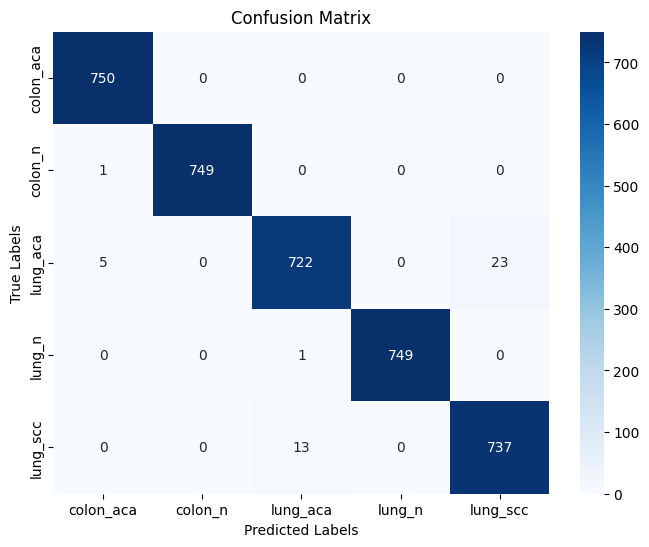

In [8]:
# prompt: matrice de confusion et le rapport de clasification

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from the model
Y_pred = hybrid_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
true_classes = test_generator.classes

# Print the classification report
class_labels = list(test_generator.class_indices.keys())
print(classification_report(true_classes, y_pred, target_names=class_labels))


# Compute and plot the confusion matrix
conf_matrix = confusion_matrix(true_classes, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

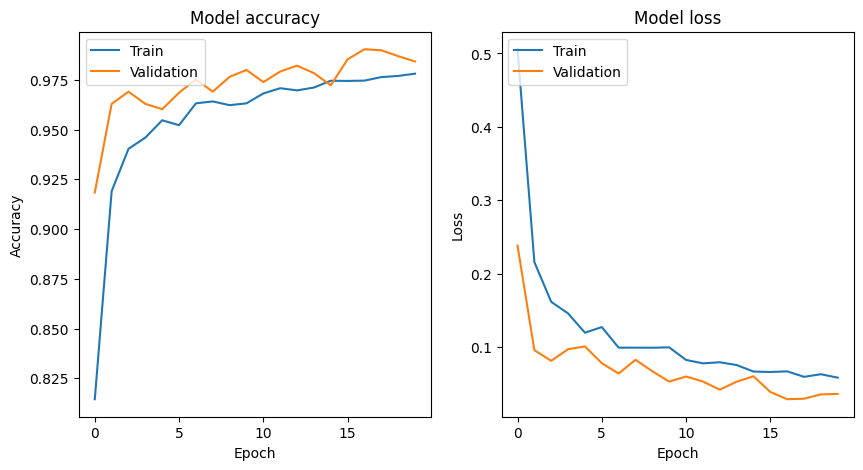

In [9]:
# prompt: afficher la courbe de validation et de perte
#from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

118/118 ━━━━━━━━━━━━━━━━━━━━ 27s 224ms/step
ROC AUC for class 0: 0.9999928888888889


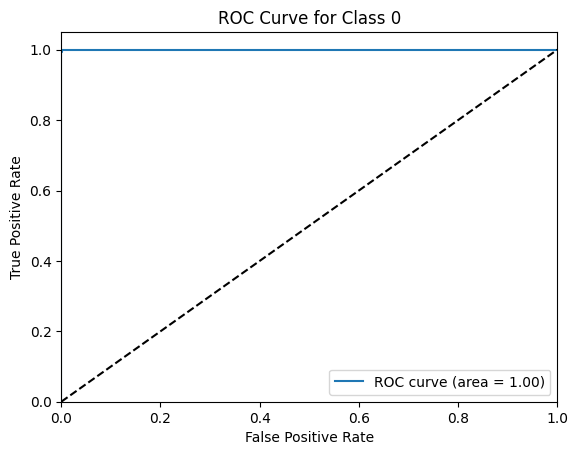

ROC AUC for class 1: 0.9999973333333333


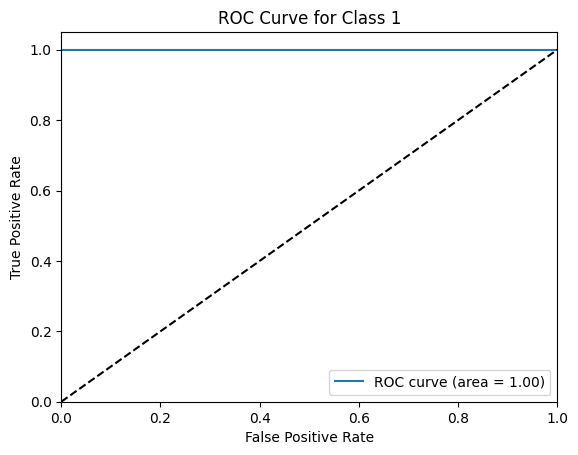

ROC AUC for class 2: 0.9992324444444445


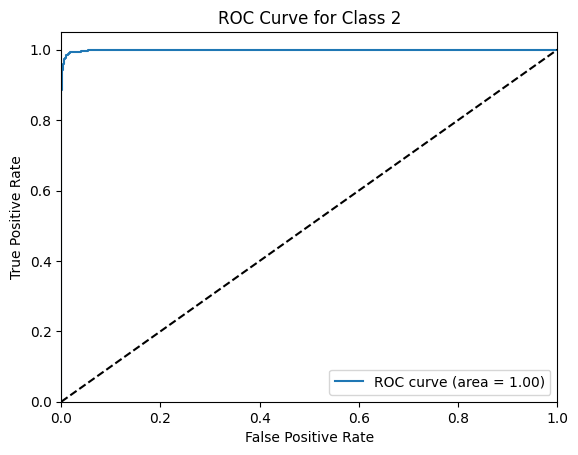

ROC AUC for class 3: 0.9999995555555555


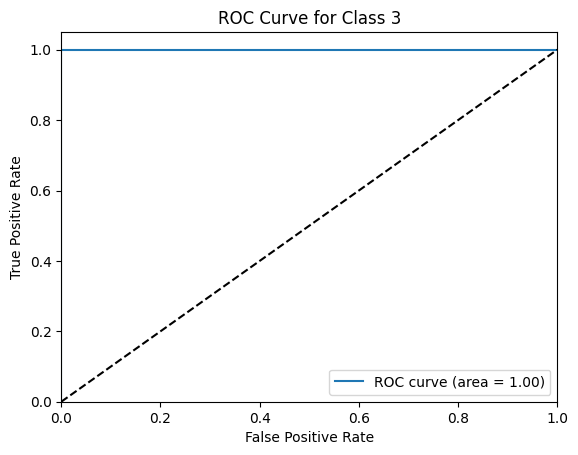

ROC AUC for class 4: 0.9995137777777778


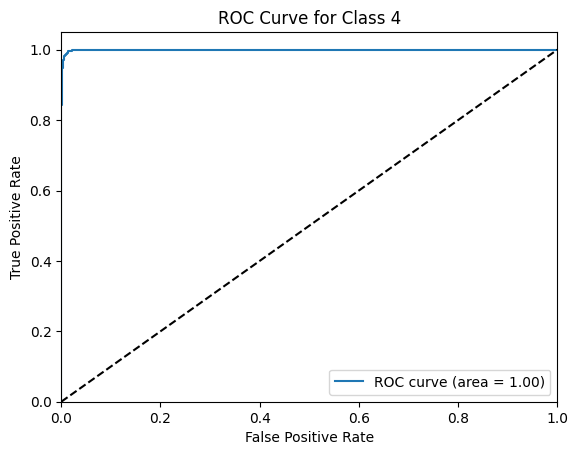

In [13]:
# prompt: ROC AUC

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Get predicted probabilities for each class
Y_pred_prob = hybrid_model.predict(test_generator)

# Assuming you have 5 classes
for i in range(5):
    # Calculate ROC AUC for each class
    roc_auc = roc_auc_score(test_generator.classes == i, Y_pred_prob[:, i])
    print(f"ROC AUC for class {i}: {roc_auc}")

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(test_generator.classes == i, Y_pred_prob[:, i])

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class {i}')
    plt.legend(loc="lower right")
    plt.show()

In [12]:
# prompt: calculer la sensitivité ,recall et la précision global du modèle

from sklearn.metrics import classification_report

# ... (Your existing code) ...

# Get predictions from the model
Y_pred = hybrid_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
true_classes = test_generator.classes

# Print the classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, y_pred, target_names=class_labels, output_dict=True)

# Access precision, recall, and F1-score for each class and overall
print("Classification Report:")
for label in class_labels:
    print(f"Class {label}:")
    print(f"  Precision: {report[label]['precision']:.4f}")
    print(f"  Recall (Sensitivity): {report[label]['recall']:.4f}")
    print(f"  F1-score: {report[label]['f1-score']:.4f}")

print("\nOverall Metrics:")
print(f"  Accuracy: {report['accuracy']:.4f}")
print(f"  Macro Average Precision: {report['macro avg']['precision']:.4f}")
print(f"  Macro Average Recall (Sensitivity): {report['macro avg']['recall']:.4f}")
print(f"  Macro Average F1-score: {report['macro avg']['f1-score']:.4f}")
print(f"  Weighted Average Precision: {report['weighted avg']['precision']:.4f}")
print(f"  Weighted Average Recall (Sensitivity): {report['weighted avg']['recall']:.4f}")
print(f"  Weighted Average F1-score: {report['weighted avg']['f1-score']:.4f}")

118/118 ━━━━━━━━━━━━━━━━━━━━ 27s 227ms/step
Classification Report:
Class colon_aca:
  Precision: 0.9921
  Recall (Sensitivity): 1.0000
  F1-score: 0.9960
Class colon_n:
  Precision: 1.0000
  Recall (Sensitivity): 0.9987
  F1-score: 0.9993
Class lung_aca:
  Precision: 0.9810
  Recall (Sensitivity): 0.9627
  F1-score: 0.9717
Class lung_n:
  Precision: 1.0000
  Recall (Sensitivity): 0.9987
  F1-score: 0.9993
Class lung_scc:
  Precision: 0.9697
  Recall (Sensitivity): 0.9827
  F1-score: 0.9762

Overall Metrics:
  Accuracy: 0.9885
  Macro Average Precision: 0.9886
  Macro Average Recall (Sensitivity): 0.9885
  Macro Average F1-score: 0.9885
  Weighted Average Precision: 0.9886
  Weighted Average Recall (Sensitivity): 0.9885
  Weighted Average F1-score: 0.9885


In [15]:
#  calculer AUC,F1-score,sensitivity,precision du modele. Global pour tout le modele
# calculer AUC,F1-score,sensitivity,precision du modele. Global pour tout le modele

from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

# ... (Your existing code) ...

# Get predictions from the model
Y_pred = hybrid_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
true_classes = test_generator.classes

# Calculate global AUC, F1-score, sensitivity, and precision
# Use 'ovr' for multiclass and provide the full probability array
roc_auc = roc_auc_score(true_classes, Y_pred, multi_class='ovr', average='weighted')
f1 = f1_score(true_classes, y_pred, average='weighted')  # Use weighted average
sensitivity = recall_score(true_classes, y_pred, average='weighted')  # Sensitivity is recall
precision = precision_score(true_classes, y_pred, average='weighted')

print(f"Global AUC: {roc_auc:.4f}")
print(f"Global F1-score: {f1:.4f}")
print(f"Global Sensitivity: {sensitivity:.4f}")
print(f"Global Precision: {precision:.4f}")

118/118 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step
Global AUC: 0.9997
Global F1-score: 0.9885
Global Sensitivity: 0.9885
Global Precision: 0.9886
